## 더미 변수와 복수 모형

### 더미 변수의 예 1

$y$가 카테고리 값을 가지는 변수 $x_1$에만 의존한다고 가정한다.

$$ y = f(x_1) $$

이 때 $x_1$은 다음과 같이  $d_1$, $d_2$, $d_3$ 라는 더미 변수로 표현할 수 있다.

* $x_1 = A$ 이면  $d_1 = 1, d_2 = 0, d_3 = 0$
* $x_1 = B$ 이면  $d_1 = 0, d_2 = 1, d_3 = 0$
* $x_1 = C$ 이면  $d_1 = 0, d_2 = 0, d_3 = 1$

더미 변수를 사용하면 선형 회귀 모형은 다음과 같다.

$$ y = w_1 d_1 + w_2 d_2 + w_3 d_3  $$

더미 변수의 값을 대입하면

* $x_1 = A$, 즉, $d_1 = 1, d_2 = 0, d_3 = 0$ 이면 $ y = w_1 = w_{A} $
* $x_1 = B$, 즉, $d_1 = 0, d_2 = 1, d_3 = 0$ 이면 $ y = w_2 = w_{B} $
* $x_1 = C$, 즉, $d_1 = 0, d_2 = 0, d_3 = 1$ 이면 $ y = w_3 = w_{C} $

이므로 사실상 3개의 독립적인 0차 모형과 같다.

위에서 사용한 모형에는 **상수항이 없다**는 사실에 유의하라. One-Hot-Encoding된 더미 변수를 사용하는 경우에는 상수항을 사용하면 그룹의 수보다 모수의 수가 많아지므로 추정이 불가능하다. 

만약 상수항을 넣고 싶다면 더미 변수의 수를 하나 줄이고 클래스 중 하나를 모든 더미 변수가 0인 경우로 보아야 한다.

$$ y = w_0 + w_1 d_1 + w_2 d_2 $$

* $x_1 = A$ 이면  $d_1 = 0, d_2 = 0$
* $x_1 = B$ 이면  $d_1 = 1, d_2 = 0$
* $x_1 = C$ 이면  $d_1 = 0, d_2 = 1$

더미 변수의 값을 대입하면

* $x_1 = A$ 이면 $ y = w_0 = w_{A} $
* $x_1 = B$ 이면 $ y = w_0 + w_1 = w_{B} $
* $x_1 = C$ 이면 $ y = w_0 + w_2 = w_{C} $

StatsModels에서는 카테고리 변수와 상수항이 동시에 존재하면 자동으로 이렇게 지정한다.

### 더미 변수의 예 2

이번에는 $y$가 카테고리 값을 가지는 변수 $x_1$과 실수 값을 가지는 변수 $x_2$에 의존한다고 가정한다. 단 $x_2$가 $y$에 미치는 영향력이 $x_1$값에 따라서 달라지지 않는다고 가정한다.

$$ y = f(x_1) + w x_2 $$

이 때는 카테고리 변수 $x_1$과 실수 변수 $x_2$를 동시에 가지는 모형을 생각하자. 
이 모형은 더미 변수를 사용하여 다음과 같이 표현할 수 있다.

$$ y = w_1 d_1 + w_2 d_2 + w_3 d_3 + w_4 x_2 $$

* $x_1 = A$, 즉, $d_1 = 1, d_2 = 0, d_3 = 0$ 이면 $ y = w_1 + w_4 x_2 $
* $x_1 = B$, 즉, $d_1 = 0, d_2 = 1, d_3 = 0$ 이면 $ y = w_2 + w_4 x_2 $
* $x_1 = C$, 즉, $d_1 = 0, d_2 = 0, d_3 = 1$ 이면 $ y = w_3 + w_4 x_2 $

따라서 $x_2$에 의한 영향은 모두 공통이고 $x_1$에 의한 영향만 다른 세 개의 모형을 동시에 회귀분석하는 것과 같다.

### 더미 변수의 예 3

이번에는 마찬가지로 $y$가 카테고리 값을 가지는 변수 $x_1$과 실수 값을 가지는 변수 $x_2$에 의존한다고 가정한다. 단 이 경우에는 $x_2$가 $y$에 미치는 영향력이 $x_1$값에 따라서 달라진다고 가정한다.

$$ y = f(x_1) + w(x_1) x_2 $$

이 때는 $x_2$에 의한 영향이 공통적이지 않는 모형을 만들어 보자. 이를 위해서는 $x_1$과 $x_2$의 곱, 즉 상호작용(interaction) 항이 필요하다.


$$ y = w_1 d_1 + w_2 d_2 + w_3 d_3 + w_4 d_1 x_2 + w_5 d_2 x_2 + w_6 d_3 x_2 $$

* $x_1 = A$, 즉, $d_1 = 1, d_2 = 0, d_3 = 0$ 이면 $ y = w_1 + w_4 x_2 $
* $x_1 = B$, 즉, $d_1 = 0, d_2 = 1, d_3 = 0$ 이면 $ y = w_2 + w_5 x_2 $
* $x_1 = C$, 즉, $d_1 = 0, d_2 = 0, d_3 = 1$ 이면 $ y = w_3 + w_6 x_2 $

## 카테고리 데이터 분석의 예

다음과 같은 월별 기온 데이터에 대해 회귀분석을 하자. 결과는 각 월에 대한 평균 기온이 된다.

In [5]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset("nottem").data

import datetime
from calendar import isleap

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df["date0"] = df[["time"]].applymap(convert_partial_year)
df["date"] = pd.DatetimeIndex(df["date0"]).round('60min') + datetime.timedelta(seconds=3600*24) 
df["month"] = df["date"].dt.strftime("%m").astype('category')
del df["date0"], df["date"]
df.tail()

,time,nottem,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


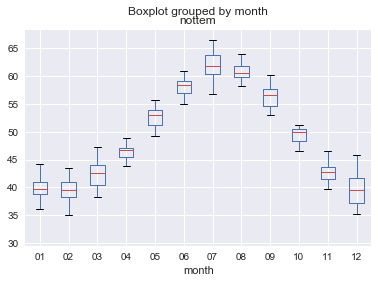

In [6]:
df.boxplot("nottem", "month")
plt.show()

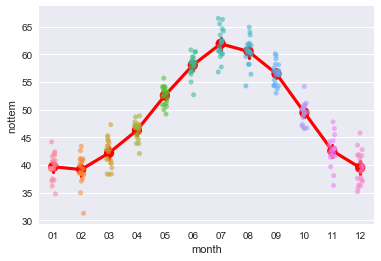

In [8]:
sns.stripplot(x="month", y="nottem", data=df, jitter=True, alpha=.6)
sns.pointplot(x="month", y="nottem", data=df, dodge=True, color='r')
plt.show()

In [9]:
model = sm.OLS.from_formula("nottem ~ C(month) + 0", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 nottem   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sun, 11 Mar 2018   Prob (F-statistic):          2.96e-125
Time:                        17:14:14   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   